# ALLAIRE Mathis & LORET Martin

In [97]:
# pour changer la largeur de la page htlm générée par Jupyter :
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

C:\Users\e2201386\AppData\local\Temp\ipykernel_2484\568132765.py:2: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


TP : Exploration et Analyse de Données avec Pandas et Streamlit
Objectif

Ce projet vise à développer vos compétences en manipulation et analyse de données à l'aide de la bibliothèque Pandas en Python. Vous apprendrez à :

    Importer et explorer des données provenant de Kaggle.
    Effectuer des requêtes et manipulations de type SQL avec Pandas.
    Créer des visualisations interactives avec Streamlit.

Ce projet est noté. Tous les codes devront être écrits en Python dans des champs jupyter et devront respecter les conventions de nommage. L'énoncé ne doit pas être modifié.

La derniere séance du projet, vous déposerez le fichier jupyter (projetSAE.ipynb) sur la plateforme pédagogique.

##### Procédure à réaliser avant les séances de TD (nous utiliserons désormais jupyter lab)
- Lancer Anaconda Prompt sous Windows
- Saisissez dans Anaconda Prompt : 
conda create -n projet python pandas numpy matplotlib jupyterlab kagglehub seaborn streamlit plotly

=> à la demande "Proceed ([y]/n)?" saisissez y (ou juste pressez sur la touche "entrée")
=> "Executing transaction" prend du temps, c'est normal
Saisissez dans Anaconda Prompt : 
conda activate projet

##### Saisissez dans Anaconda Prompt : 
jupyter lab --notebook-dir="h:/"
Ouvrir projetSAE.ipynb dans Jupyter

jupyter lab --notebook-dir="h:/" Projet_SAE.ipynb

In [98]:
%matplotlib notebook
%pip install pycountry
%matplotlib inline
import os
import shutil
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import streamlit as st
import pycountry

Note: you may need to restart the kernel to use updated packages.


### Partie 1 : importation et exploration des données

#### Travailler avec Git
1 - En utilisant le prompt conda : initialiser le projet 

2 - Ajouter le fichier Jupyter Notebook et faite votre premier commit 
 
3 -  Creer un projet sur github dépôt distant (sans README.md )

4 - Pousser le projet vers ce dépôt 

5 - Enlever les checkpoint de jupyter 

#### Questions
1. Téléchargez le Dataset **Data Science Salaries 2023** sur Kaggle (https://www.kaggle.com/datasets/) via **kagglehub**.
2. Copier le fichier du cache au répertoire du projet, décompresser et visualiser le fichier CSV **ds_salaries.csv**
3. Importez le fichiers CSV avec Pandas.

##### Votre code

In [99]:
chemin_projet = 'H:/SD3/S1/SAE 601/ds_salaries.csv' 

df = pd.read_csv(chemin_projet)

df.head()


,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


##### Une bonne pratique 
- Copier les données téléchargées et les coller dans le répertoire du projet.
Pour cela, utilisez la bibliothéque os et shutil

In [100]:
# Répertoire cible dans votre projet
#project_dir = r"....."



# Créer le répertoire (si nécessaire)
os.makedirs(project_dir, exist_ok=True)

# Copier le fichier depuis le cache au répertoire du projet
#cache_file = r"..........ds_salaries.csv"
shutil.copy(cache_file, project_dir)

NameError: name 'project_dir' is not defined

In [2]:
# Lire le fichier depuis le répertoire du projet


,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


### Partie 2 : Analyses exploratoires

#### Question 1 :
Nous Souhaitons :

1. Connaitre est ce qu'il y a des données manquantes dans notre dataset.
2. Voir la distribution des salaires en USD avec la bibliothèque seaborn sous fome d'histogramme
3. avoir la liste des pays concerné par l'étude 
4. connaitre les salaire moyen par rôle, par pays, par niveau d'expérience

#### Votre code

# Valeurs manquantes

In [101]:


missing_data = df.isnull().sum().reset_index()
missing_data.columns = ["Colonne", "Valeurs manquantes"]

# Ajout d'un pourcentage pour mieux visualiser
missing_data["% Manquant"] = (missing_data["Valeurs manquantes"] / len(df) * 100).round(2)

# Mise en forme avec Pandas Styler
styled_missing_data = (
    missing_data.style
    .format({"Valeurs manquantes": "{:,}", "% Manquant": "{:.2f}%"})  # Formatage des nombres
    .background_gradient(cmap="Reds", subset=["Valeurs manquantes"])  # Couleurs pour voir les valeurs critiques
    .set_caption("📊 Données manquantes par colonne")  # Titre du tableau
    .set_table_styles([{'selector': 'caption', 'props': 'font-size:16px; font-weight: bold;'}])
)

# Affichage propre (uniquement dans un Notebook Jupyter)
display(styled_missing_data)


,Colonne,Valeurs manquantes,% Manquant
0,work_year,0,0.00%
1,experience_level,0,0.00%
2,employment_type,0,0.00%
3,job_title,0,0.00%
4,salary,0,0.00%
5,salary_currency,0,0.00%
6,salary_in_usd,0,0.00%
7,employee_residence,0,0.00%
8,remote_ratio,0,0.00%
9,company_location,0,0.00%


# Distributions des Salaires en USD

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


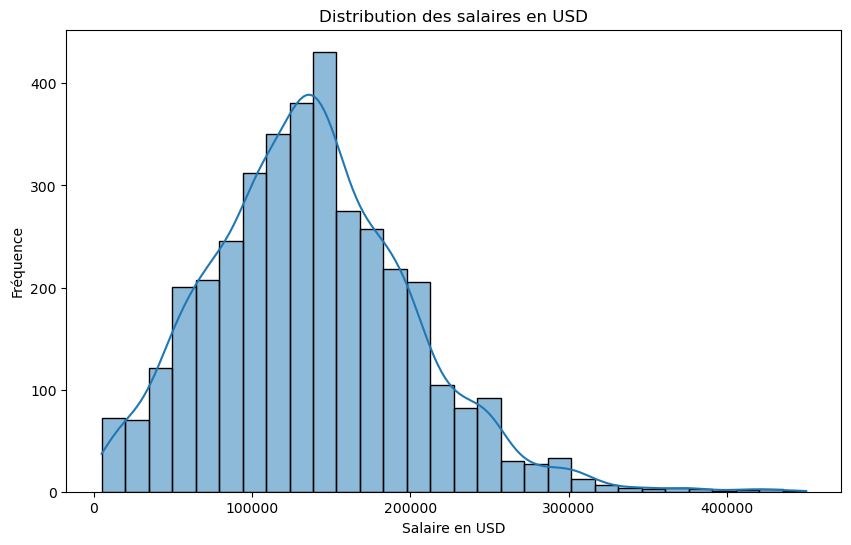

In [102]:
plt.figure(figsize=(10, 6))
sns.histplot(df['salary_in_usd'], bins=30, kde=True)
plt.title('Distribution des salaires en USD')
plt.xlabel('Salaire en USD')
plt.ylabel('Fréquence')
plt.show()

Cette distribution est typique d'un domaine où la majorité des employés ont des salaires relativement standards, tandis qu'une minorité touche des rémunérations très élevées, typique des secteurs comme la tech, la finance ou les grandes entreprises. Une grande partie des salaires se situe entre 50 000 et 200 000 USD.

# Conversion des pays 

In [103]:
 """
    Convertit un code pays en son nom complet en utilisant la bibliothèque pycountry.
"""
def get_country_name(code):
   
    try:
        return pycountry.countries.get(alpha_2=code).name  # Récupère le nom du pays
    except AttributeError:
        return code  # Si le code n'existe pas dans pycountry, on le laisse inchangé

# Applique la fonction sur la colonne 'company_location' pour créer une nouvelle colonne 'country_name'
df['country_name'] = df['company_location'].apply(get_country_name)



# Liste des pays concernés par l'étude 

In [104]:
import pandas as pd

# Récupérer la liste unique des pays
pays = pd.DataFrame(df['country_name'].unique(), columns=["Pays"])

# Ajout d'un index pour un affichage plus propre
pays.index = pays.index + 1  

# Mise en forme avec Pandas Styler
styled_pays = (
    pays.style
    .set_caption("🌍 Liste des pays concernés par l'étude")  # Titre du tableau
    .set_table_styles([{'selector': 'caption', 'props': 'font-size:16px; font-weight: bold;'}])
    .hide(axis="index")  # Cache l'index Pandas si tu veux juste la liste
)

# Affichage dans un Notebook Jupyter
display(styled_pays)


Pays
Spain
United States
Canada
Germany
United Kingdom
Nigeria
India
Hong Kong
Netherlands
Switzerland


# Salaire moyen par métiers 

In [105]:




# Salaire moyen par pays
salaire_par_pays = df.groupby('country_name')['salary_in_usd'].mean().reset_index()
salaire_par_pays = salaire_par_pays.sort_values(by="salary_in_usd", ascending=False)

# Salaire moyen par niveau d'expérience
salaire_par_experience = df.groupby('experience_level')['salary_in_usd'].mean().reset_index()
salaire_par_experience = salaire_par_experience.sort_values(by="salary_in_usd", ascending=False)

# 🔥 Mise en forme avec Pandas Styler
def style_table(df, title):
    return (
        df.style
        .format({"salary_in_usd": "${:,.0f}"})  # Format monétaire
        .background_gradient(cmap="Blues", subset=["salary_in_usd"])  # Dégradé de couleur
        .set_caption(title)  # Titre du tableau
        .set_table_styles([{'selector': 'caption', 'props': 'font-size:16px; font-weight: bold;'}])
    )



display(style_table(salaire_par_pays, "🌍 Salaires moyens par pays"))

,country_name,salary_in_usd
36,Israel,"$271,446"
56,Puerto Rico,"$167,500"
70,United States,"$151,822"
58,Russian Federation,"$140,333"
12,Canada,"$131,918"
49,New Zealand,"$125,000"
10,Bosnia and Herzegovina,"$120,000"
35,Ireland,"$114,943"
38,Japan,"$114,127"
63,Sweden,"$105,000"


# Salaire moyen par niveau d'éxperience 

In [106]:
display(style_table(salaire_par_experience, "📈 Salaires moyens par niveau d'expérience"))

,experience_level,salary_in_usd
1,EX,"$194,931"
3,SE,"$153,051"
2,MI,"$104,526"
0,EN,"$78,546"


#### Question 2 :
Nous Souhaitons :

1. Filtrer les salaires pour un pays donné (ex : US)
2. Connaitre les top 5 des entreprises qui paient le plus

3. Filtrage et agrégation:
    - Afficher tous les employés dont le salaire est supérieur à 100 000 USD, ainsi que leur rôle.
    - Pays avec la plus forte proportion de télétravail (remote_ratio = 100)
       
4. Requêtes conditionnelles: 
    - Salaire moyen des employés à distance (100%)
    - Comparer salaires moyens pour deux catégories
        
5. Ajouter une colonne pour les fourchettes de salaires
6. Corrélations : Relation entre télétravail et salaire: 
 -
7. Salaire moyen par taille d'entreprise 
8. faire un tableau croisé : Moyenne des salaires par niveau d'expérience et télétravail

# Salaire pour chaque métier

In [107]:

# Filtrer les salaires pour un pays donné (ex : US)
df_us = df[df['company_location'] == 'US']

# Sélectionner et préparer les données
result = df_us[['job_title', 'salary_in_usd']].sort_values('salary_in_usd', ascending=False)

# Mise en forme avec Pandas Styler
styled_result = (
    result.style
    .format({"salary_in_usd": "${:,.0f}"})  # Formatage des salaires
    .background_gradient(cmap="Blues", subset=["salary_in_usd"])  # Dégradé de couleurs pour les salaires
    .set_caption("💼 Salaires pour les employés aux États-Unis")  # Titre du tableau
    .set_table_styles([
        {'selector': 'caption', 'props': 'font-size:16px; font-weight: bold;'},
        {'selector': 'th', 'props': 'background-color: #f2f2f2; color: black;'}
    ])
    .hide(axis="index")  # Cacher l'index
)

# Affichage propre (uniquement dans un Notebook Jupyter)
display(styled_result)



job_title,salary_in_usd
Research Scientist,"$450,000"
Applied Machine Learning Scientist,"$423,000"
Principal Data Scientist,"$416,000"
Data Scientist,"$412,000"
Data Analytics Lead,"$405,000"
Data Analyst,"$385,000"
Applied Data Scientist,"$380,000"
Data Architect,"$376,080"
Machine Learning Software Engineer,"$375,000"
Data Science Tech Lead,"$375,000"


# Salaire Moyen par métier

In [108]:


# Calculer la moyenne des salaires par métier
salaires_moyens = df.groupby('job_title')['salary_in_usd'].mean().sort_values(ascending=False).reset_index()
salaires_moyens.columns = ['Métier', 'Salaire moyen (USD)']

# Créer un Styler
styled_salaires = salaires_moyens.style

# Appliquer le formatage et le style
styled_salaires = (
    styled_salaires
    .format({'Salaire moyen (USD)': '${:,.0f}'})
    .background_gradient(cmap='viridis', subset=['Salaire moyen (USD)'])
    .set_caption("💼 Salaire moyen par métier")
    .set_table_styles([
        {'selector': 'caption', 'props': 'caption-side: top; font-size:1.25em; font-weight:bold;'},
        {'selector': 'th', 'props': 'background-color: #f2f2f2; color: black;'}
    ])
    .hide(axis='index')
)

# Afficher le résultat
display(styled_salaires)


Métier,Salaire moyen (USD)
Data Science Tech Lead,"$375,000"
Cloud Data Architect,"$250,000"
Data Lead,"$212,500"
Data Analytics Lead,"$211,254"
Principal Data Scientist,"$198,171"
Director of Data Science,"$195,141"
Principal Data Engineer,"$192,500"
Machine Learning Software Engineer,"$192,420"
Data Science Manager,"$191,279"
Applied Scientist,"$190,264"


# Top 5 des entreprises 

In [109]:


top_5_entreprises = df.groupby('country_name')['salary_in_usd'].mean().sort_values(ascending=False).head(5).reset_index()
top_5_entreprises.columns = ['Pays', 'Salaire moyen (USD)']

# Mise en forme avec Pandas Styler
styled_top_5 = (
    top_5_entreprises.style
    .format({"Salaire moyen (USD)": "${:,.0f}"})  # Formatage des salaires
    .background_gradient(cmap="Greens", subset=["Salaire moyen (USD)"])  # Dégradé de couleurs pour les salaires
    .set_caption("🌍 Top 5 des entreprises avec les salaires moyens les plus élevés")  # Titre du tableau
    .set_table_styles([
        {'selector': 'caption', 'props': 'font-size:16px; font-weight: bold;'},
        {'selector': 'th', 'props': 'background-color: #f2f2f2; color: black;'}
    ])
    .hide(axis="index")  # Cacher l'index
    .bar(subset=["Salaire moyen (USD)"], color="#a8d8a8", vmin=0)  # Ajouter des barres de progression
)

# Affichage propre (uniquement dans un Notebook Jupyter)
display(styled_top_5)


Pays,Salaire moyen (USD)
Israel,"$271,446"
Puerto Rico,"$167,500"
United States,"$151,822"
Russian Federation,"$140,333"
Canada,"$131,918"


# Rôles avec un salaire moyen supérieur à 100,000

In [110]:

salaires_plus_100k = df[df['salary_in_usd'] > 100000][['job_title', 'salary_in_usd']].sort_values('salary_in_usd', ascending=False)

# Styliser le tableau des salaires supérieurs à 100k
styled_salaires_100k = (
    salaires_plus_100k.style
    .format({"salary_in_usd": "${:,.0f}"})
    .background_gradient(cmap="Greens", subset=["salary_in_usd"])
    .set_caption("💰 Employés avec un salaire supérieur à 100 000 USD")
    .set_table_styles([
        {'selector': 'caption', 'props': 'font-size:16px; font-weight: bold;'},
        {'selector': 'th', 'props': 'background-color: #f2f2f2; color: black;'}
    ])
    .hide(axis="index")
)

# Afficher le tableau des salaires supérieurs à 100k
display(styled_salaires_100k)



job_title,salary_in_usd
Research Scientist,"$450,000"
Data Analyst,"$430,967"
AI Scientist,"$423,834"
Applied Machine Learning Scientist,"$423,000"
Principal Data Scientist,"$416,000"
Data Scientist,"$412,000"
Data Analytics Lead,"$405,000"
Data Analyst,"$385,000"
Applied Data Scientist,"$380,000"
Data Architect,"$376,080"


# Pays avec la plus forte proportion de télétravail (remote_ratio = 100)

In [111]:
# Calculer le nombre total d'employés par pays
total_employees_by_country = df['country_name'].value_counts()

# Filtrer les employés ayant 100% de télétravail
remote_employees = df[df['remote_ratio'] == 100]['country_name'].value_counts()

# Calculer le ratio de télétravail par pays
ratio_remote_by_country = remote_employees / total_employees_by_country * 100

# Sélectionner le pays avec le plus grand ratio de télétravail
max_ratio_country = ratio_remote_by_country.idxmax()
max_ratio_value = ratio_remote_by_country.max()

# Affichage amélioré du pays avec le plus grand ratio

print(f"\n🏆 Le pays avec le plus grand ratio de télétravail est : {max_ratio_country}")
print(f"🔢 Ratio de télétravail : {max_ratio_value:.2f}%")



🏆 Le pays avec le plus grand ratio de télétravail est : Argentina
🔢 Ratio de télétravail : 100.00%


# Calculer le salaire moyen des employés à distance (100%)

In [112]:


salaire_remote = df[df['remote_ratio'] == 100]['salary_in_usd'].mean()

# Créer un DataFrame pour afficher le résultat
df_remote = pd.DataFrame({'Catégorie': ['Employés à distance (100%)'],
                          'Salaire moyen (USD)': [salaire_remote]})

# Styliser le tableau du salaire moyen des employés à distance
styled_remote = (
    df_remote.style
    .format({'Salaire moyen (USD)': '${:,.0f}'})
    .set_caption("💻 Salaire moyen des employés à distance")
    .set_table_styles([
        {'selector': 'caption', 'props': 'font-size:16px; font-weight: bold;'},
        {'selector': 'th', 'props': 'background-color: #f2f2f2; color: black;'}
    ])
    .hide(axis="index")
)

# Afficher le tableau du salaire moyen des employés à distance
display(styled_remote)




Catégorie,Salaire moyen (USD)
Employés à distance (100%),"$136,481"


# Comparaison des salaires moyens pour les différentes catégories de remote_ratio

In [113]:

salaire_comparaison = df.groupby('remote_ratio')['salary_in_usd'].mean().reset_index()
salaire_comparaison['remote_ratio'] = salaire_comparaison['remote_ratio'].map({0: 'Sur site', 50: 'Hybride', 100: 'À distance'})
salaire_comparaison.columns = ['Modalité de travail', 'Salaire moyen (USD)']

# Styliser le tableau de comparaison des salaires
styled_comparaison = (
    salaire_comparaison.style
    .format({'Salaire moyen (USD)': '${:,.0f}'})
    .background_gradient(cmap="YlOrRd", subset=["Salaire moyen (USD)"])
    .set_caption("🏢 vs 🏠 Comparaison des salaires moyens selon la modalité de travail")
    .set_table_styles([
        {'selector': 'caption', 'props': 'font-size:16px; font-weight: bold;'},
        {'selector': 'th', 'props': 'background-color: #f2f2f2; color: black;'}
    ])
    .hide(axis="index")
    .bar(subset=["Salaire moyen (USD)"], color="#b3d9ff", vmin=0)
)

# Afficher le tableau de comparaison des salaires
display(styled_comparaison)


Modalité de travail,Salaire moyen (USD)
Sur site,"$144,316"
Hybride,"$78,401"
À distance,"$136,481"


## Commentaire : 
on peut donc voir que les boulot sur site sont mieux payé ( mais attention cela n'est pas correlé)

# Comparaison des salaire moyen selon la modalité de travail

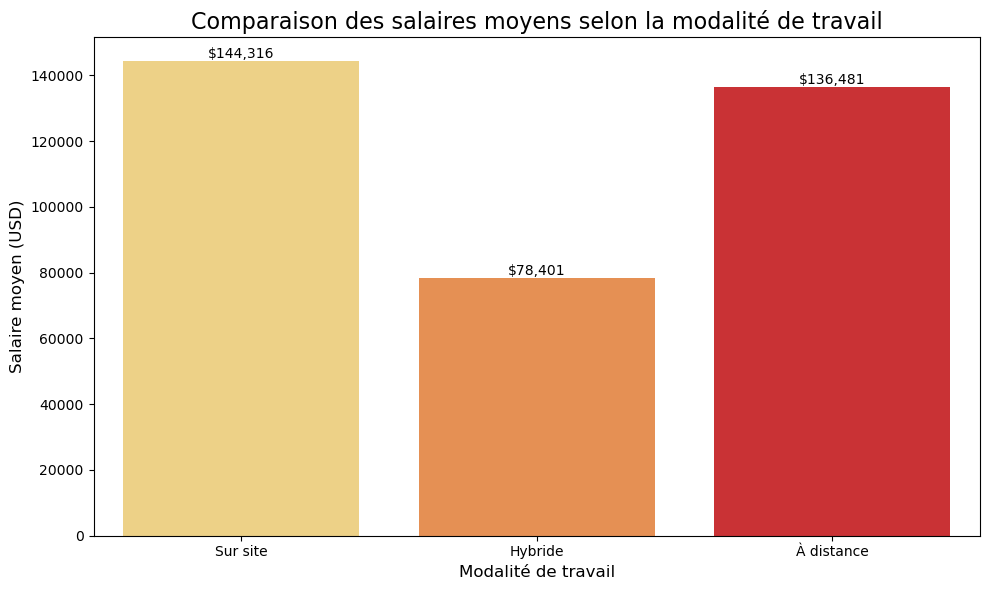

In [114]:

plt.figure(figsize=(10, 6))
sns.barplot(x='Modalité de travail', y='Salaire moyen (USD)', data=salaire_comparaison, palette="YlOrRd")
plt.title('Comparaison des salaires moyens selon la modalité de travail', fontsize=16)
plt.xlabel('Modalité de travail', fontsize=12)
plt.ylabel('Salaire moyen (USD)', fontsize=12)
plt.xticks(rotation=0)
for i, v in enumerate(salaire_comparaison['Salaire moyen (USD)']):
    plt.text(i, v, f'${v:,.0f}', ha='center', va='bottom')
plt.tight_layout()
plt.show()


# Échantillon de salaires avec fourchettes

In [115]:
bins = [0, 50000, 100000, 150000, 200000, float('inf')]
labels = ['0-50k', '50k-100k', '100k-150k', '150k-200k', '200k+']
df['fourchette_salaire'] = pd.cut(df['salary_in_usd'], bins=bins, labels=labels)

sample_df = df[['job_title', 'salary_in_usd', 'fourchette_salaire']].sample(n=10, random_state=42)


styled_sample = (
    sample_df.style
    .format({'salary_in_usd': '${:,.0f}'})
    .background_gradient(cmap="YlOrRd", subset=["salary_in_usd"])
    .set_caption("💼 Échantillon de salaires avec fourchettes")
    .set_table_styles([
        {'selector': 'caption', 'props': 'font-size:16px; font-weight: bold;'},
        {'selector': 'th', 'props': 'background-color: #f2f2f2; color: black;'}
    ])
    .hide(axis="index")
)


display(styled_sample)





job_title,salary_in_usd,fourchette_salaire
Machine Learning Software Engineer,"$168,000",150k-200k
Data Analyst,"$179,975",150k-200k
Data Scientist,"$144,000",100k-150k
Applied Scientist,"$222,200",200k+
Head of Data,"$230,000",200k+
Applied Data Scientist,"$40,000",0-50k
Data Scientist,"$105,000",100k-150k
Data Analyst,"$100,000",50k-100k
Data Scientist,"$29,751",0-50k
Machine Learning Engineer,"$153,090",150k-200k


## Commentraire : 
On peut voir que les meilleurs salaires sont dans les Machine Learning Software Engineer 	

# Relation entre télétravail et salaire

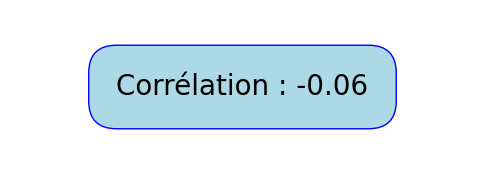

In [116]:


# Relation entre télétravail et salaire
correlation_remote_salary = df[['remote_ratio', 'salary_in_usd']].corr().iloc[0, 1]

# Création de la visualisation
fig, ax = plt.subplots(figsize=(6, 2))
ax.text(0.5, 0.5, f'Corrélation : {correlation_remote_salary:.2f}', fontsize=20, ha='center', va='center', 
        bbox=dict(facecolor='lightblue', edgecolor='blue', boxstyle='round,pad=1'))

# Enlever les axes
ax.axis('off')

# Afficher le graphique
plt.show()


## Commentraire : 
On peut donc voir que c'est une corrélation de -0,06 et donc indique une corrélation très faible et négligeable 

# Calcul du salaire moyen par taille d'entreprise

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


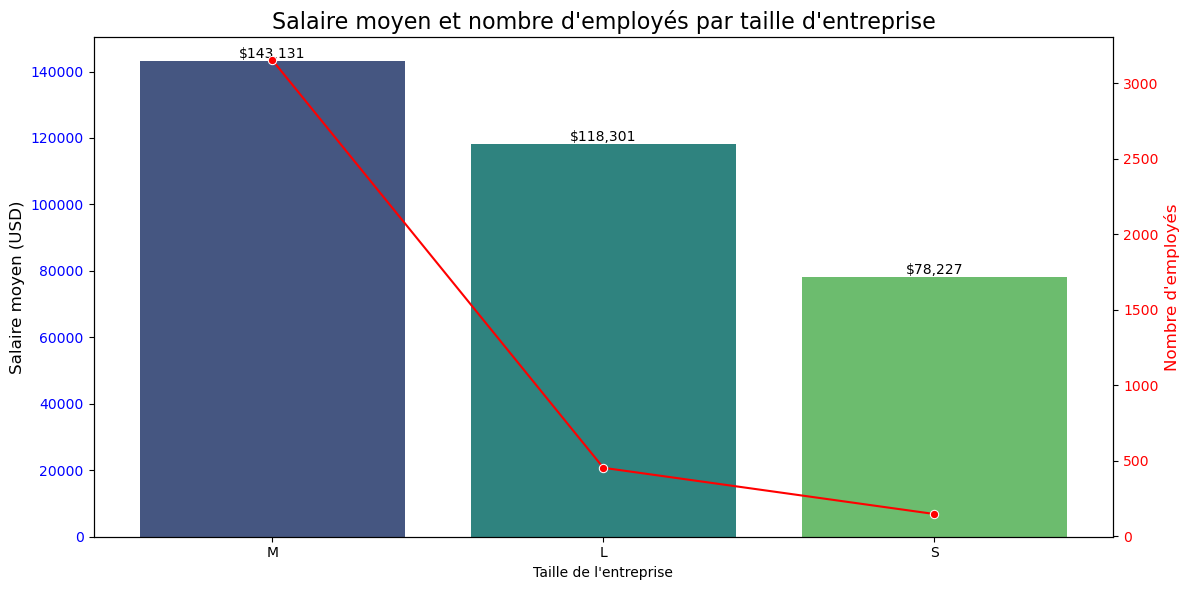

In [117]:


salaire_par_taille = df.groupby('company_size').agg({
    'salary_in_usd': ['mean', 'count']
}).reset_index()

# Renommer les colonnes pour plus de clarté
salaire_par_taille.columns = ['Taille de l\'entreprise', 'Salaire moyen', 'Nombre d\'employés']

# Trier par salaire moyen décroissant
salaire_par_taille = salaire_par_taille.sort_values('Salaire moyen', ascending=False)



# Créer un graphique à barres pour visualiser les données
fig, ax1 = plt.subplots(figsize=(12, 6))

# Barres pour le salaire moyen
sns.barplot(x='Taille de l\'entreprise', y='Salaire moyen', data=salaire_par_taille, palette="viridis", ax=ax1)
ax1.set_ylabel('Salaire moyen (USD)', fontsize=12)
ax1.tick_params(axis='y', labelcolor='b')

# Axe secondaire pour le nombre d'employés
ax2 = ax1.twinx()
sns.lineplot(x='Taille de l\'entreprise', y='Nombre d\'employés', data=salaire_par_taille, color='r', marker='o', ax=ax2)
ax2.set_ylabel('Nombre d\'employés', fontsize=12, color='r')
ax2.tick_params(axis='y', labelcolor='r')

plt.title('Salaire moyen et nombre d\'employés par taille d\'entreprise', fontsize=16)
plt.xlabel('Taille de l\'entreprise', fontsize=12)
plt.xticks(rotation=45)

# Ajouter les valeurs sur les barres
for i, v in enumerate(salaire_par_taille['Salaire moyen']):
    ax1.text(i, v, f'${v:,.0f}', ha='center', va='bottom', color='black')

plt.tight_layout()
plt.show()


# Moyenne des salaires en USD par niveau d'expérience et télétravail

In [118]:


pivot_table = df.pivot_table(
    index='experience_level',      
    columns='remote_ratio',        
    values='salary_in_usd',        
    aggfunc='mean'                  
)

# Amélioration de l'affichage
styled_pivot = (
    pivot_table.style
    .format("${:,.0f}")  # Format monétaire sans décimales
    .background_gradient(cmap='Blues')  # Ajout d'un gradient de couleur
    .set_caption("Moyenne des salaires en USD par niveau d'expérience et télétravail")  
    .set_table_styles([{'selector': 'caption', 'props': 'font-size:16px; font-weight: bold;'}]) 
)

# Affichage dans un Notebook Jupyter
display(styled_pivot)


remote_ratio,0,50,100
experience_level,,,
EN,"$104,582","$64,006","$65,040"
EX,"$182,436","$139,030","$214,837"
MI,"$116,723","$74,214","$96,803"
SE,"$154,024","$98,438","$154,022"


## Commentaire : 
Nous pouvons voir que les personnes les mieux payer sont les experts peu importe leurs modalitées de travail